## Module 3 Exercises

We will work with auto-mpg dataset in this exercises notebook. Most of the exercises will be similar to what you have seen in lab and practice notebooks. You may have to look up for a function or a concept to solve one or two problems in the notebook. But all questions are closed book questions which do not ask beyond what you learned in the class.

Load the data `\datasets\auto-mpg\auto-mpg.csv` into R and name the dataframe as `auto_data`

In [45]:
auto_data <- read.csv("../../../datasets/auto-mpg/auto-mpg.csv",header=TRUE,sep=',')
head(auto_data)

mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


**Question 1: ** Display first 10 rows of data for columns mpg, horsepower and car.name

In [46]:
head(auto_data[c ('mpg','horsepower','car.name')], 10)

mpg,horsepower,car.name
18,130.0,chevrolet chevelle malibu
15,165.0,buick skylark 320
18,150.0,plymouth satellite
16,150.0,amc rebel sst
17,140.0,ford torino
15,198.0,ford galaxie 500
14,220.0,chevrolet impala
14,215.0,plymouth fury iii
14,225.0,pontiac catalina
15,190.0,amc ambassador dpl


**Question 2: ** Use factor() fucntion to convert the labels of origin column in auto_data from (1,2,3) to (america,europe and asia)

In [47]:
auto_data$origin = factor(auto_data$origin,labels = c("america", "europe","asia"))

**Question 3: ** Create a subset called mpg_data of auto_data to include rows which have mpg >= 12 and <= 15. Select columns cylinders, weight, acceleration, car.name to include in the subset. 

In [48]:
library(dplyr)  
mpg_data = auto_data[c('mpg','horsepower','car.name')] %>% filter(mpg >= 12 & mpg <=15)
head(mpg_data)

mpg,horsepower,car.name
15,165.0,buick skylark 320
15,198.0,ford galaxie 500
14,220.0,chevrolet impala
14,215.0,plymouth fury iii
14,225.0,pontiac catalina
15,190.0,amc ambassador dpl


**Question 4: ** Create a two-way table called "cars_by_origin" for origin and cylinders columns of auto_data. Add rows and columns using addmargins() function.

In [57]:
# Two-way table
cars_by_origin = table(auto_data$origin,auto_data$cylinders)
head(cars_by_origin)
# Adding row/col margins
addmargins(cars_by_origin)

         
            3   4   5   6   8
  america   0  72   0  74 103
  europe    0  63   3   4   0
  asia      4  69   0   6   0

,3,4,5,6,8,Sum
america,0,72,0,74,103,249
europe,0,63,3,4,0,70
asia,4,69,0,6,0,79
Sum,4,204,3,84,103,398


**Question 5** Perform chi-squared test for origin and cylinders using the two way table "cars_by_origin" we created above. 

In [60]:
chisq.test(cars_by_origin) 

Warning message in chisq.test(cars_by_origin):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  cars_by_origin
X-squared = 180.1, df = 8, p-value < 2.2e-16


**Question 6: ** Use prop.table function on two way table "cars_by_origin" to find column wise proportion of cars in percentages. 

In [66]:
prop.table(cars_by_origin)

         
                    3           4           5           6           8
  america 0.000000000 0.180904523 0.000000000 0.185929648 0.258793970
  europe  0.000000000 0.158291457 0.007537688 0.010050251 0.000000000
  asia    0.010050251 0.173366834 0.000000000 0.015075377 0.000000000

**Question 7.a: ** Create a subset from auto_data which includes columns of non factor type. Assign the result to a variable called "less_data"

In [72]:
less_data = auto_data[,sapply(auto_data,function(x) !is.factor(x))]
head(less_data)

mpg,cylinders,displacement,weight,acceleration,model.year
18,8,307,3504,12.0,70
15,8,350,3693,11.5,70
18,8,318,3436,11.0,70
16,8,304,3433,12.0,70
17,8,302,3449,10.5,70
15,8,429,4341,10.0,70


**Question 7.b: ** Find standard deviation of columns in less_data. Use apply() function to find standard deviation of all columns.

In [77]:
#the second argument 2 denotes columns
apply(less_data,2,sd)

mpg    cylinders displacement       weight acceleration   model.year 
    7.815984     1.701004   104.269838   846.841774     2.757689     3.697627

**Question 8: ** Generate a correlation plot for less_data using corrplot() function in corrplot library(). 

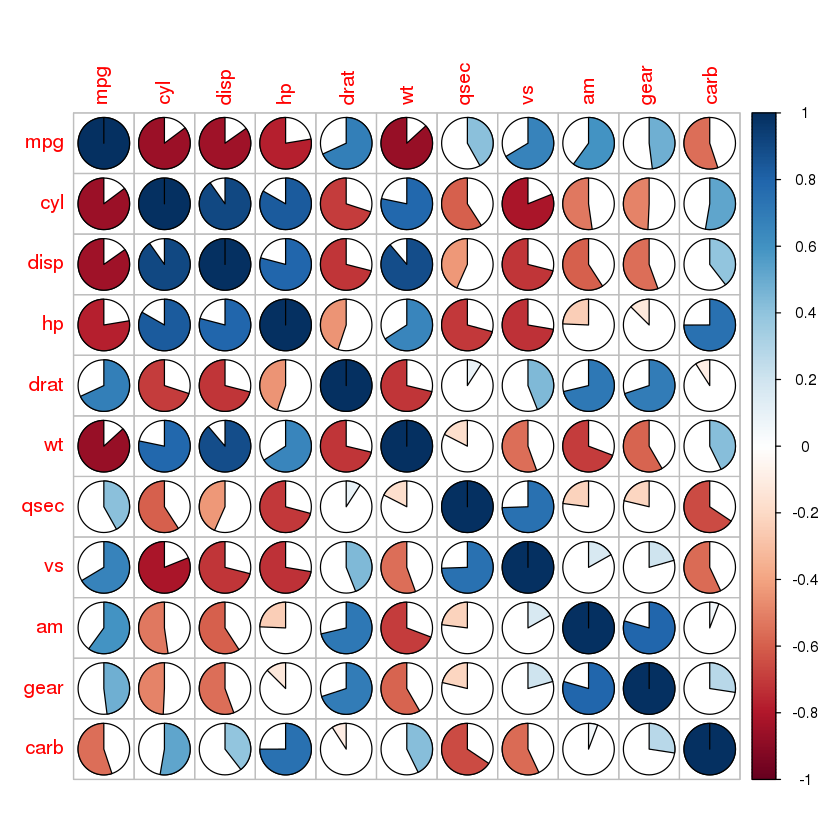

In [79]:
library('corrplot')
less_data_corr = cor(mtcars)
corrplot(less_data_corr, method="pie") #using pie method as it seems easier to understand the correlation

**Question 9: **Use the information.gain function in FSelector package to find the information again for `"mpg"` variable in auto_data against all other variables in dataset.

In [82]:
library(FSelector)
mpg_weights <- information.gain(mpg~., auto_data)
print(mpg_weights)

             attr_importance
cylinders          0.5220615
displacement       0.6184178
horsepower         0.8881498
weight             0.5985351
acceleration       0.1444897
model.year         0.2483067
origin             0.2176345
car.name           1.4154801


**Question 10.a: ** Run princomp() function on less_data and assign the result to less_data_pca. Run summary() on the result.

In [125]:
less_data_pca = princomp(less_data, cor = TRUE)
summary(less_data_pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4    Comp.5
Standard deviation     2.0335749 0.9267499 0.8400436 0.43234541 0.2788290
Proportion of Variance 0.6892378 0.1431442 0.1176122 0.03115376 0.0129576
Cumulative Proportion  0.6892378 0.8323820 0.9499942 0.98114799 0.9941056
                            Comp.6
Standard deviation     0.188059656
Proportion of Variance 0.005894406
Cumulative Proportion  1.000000000

**Question 10.b: ** How many principal components are enough to explain 99% of variance in the data. 

````
5 components.

````

**Question 11:** Fit a linear regression model to predict mpg using principal component 1 generated above. name the model as model1 

In [127]:
#Code for question 11 goes here----
model1 = lm(less_data$mpg~less_data_pca$scores[,1])
summary(model1)


Call:
lm(formula = less_data$mpg ~ less_data_pca$scores[, 1])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7410 -2.3376 -0.0796  1.9488 11.9840 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               23.51457    0.16743  140.44   <2e-16 ***
less_data_pca$scores[, 1]  3.47142    0.08233   42.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.34 on 396 degrees of freedom
Multiple R-squared:  0.8178,	Adjusted R-squared:  0.8174 
F-statistic:  1778 on 1 and 396 DF,  p-value: < 2.2e-16


**Question 12.a:** Fit a linear regression model to predict mpg using principal components 1 and 2 generated above. Name the model as model2

In [128]:
#Code for question 12 goes here----
model2 = lm(less_data$mpg~less_data_pca$scores[,1]+less_data_pca$scores[,2])
summary(model2)


Call:
lm(formula = less_data$mpg ~ less_data_pca$scores[, 1] + less_data_pca$scores[, 
    2])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6221 -2.2322  0.0677  1.8617 10.8747 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               23.51457    0.15568 151.043  < 2e-16 ***
less_data_pca$scores[, 1]  3.47142    0.07656  45.345  < 2e-16 ***
less_data_pca$scores[, 2] -1.33367    0.16799  -7.939 2.13e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.106 on 395 degrees of freedom
Multiple R-squared:  0.8429,	Adjusted R-squared:  0.8421 
F-statistic:  1060 on 2 and 395 DF,  p-value: < 2.2e-16


**Question 12.b** Compare model1 and model2 and write few words about your observations on improvement in model accuracy $R^2$

````
       model2 is a better model with R2 value of 0.8421 vs model 1 with 0.8174. Model2 is using more components to describe variance and hence the better fit.

````